<a href="https://colab.research.google.com/github/TonyHamilton10/MyDataAnalyst/blob/main/HamiltonPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
mydata = pd.read_excel('C:/Users/user/Desktop/EXCEL WORKSHEETS/Power BI Exercise Files/Sample Superstore.xlsx')
mydata.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [ ]:
mydata.pivot_table(index='Ship Date' , columns='Product Category' , values='Sales' , aggfunc='median')

Product Category,Furniture,Office Supplies,Technology
Ship Date,,,
2010-01-02,1239.060,157.27,NaN
2010-01-03,NaN,193.88,NaN
2010-01-04,174.500,41.60,NaN
2010-01-05,346.520,18.86,224.120
2010-01-06,431.915,47.18,121.955
...,...,...,...
2013-12-30,296.940,230.45,657.775
2014-01-02,200.570,1712.96,NaN
2014-01-14,NaN,NaN,9375.350


In [ ]:
mydata['Ship_Date_Month']  = mydata['Ship Date'].dt.month
mydata['Ship_Date_Year']  = mydata['Ship Date'].dt.year

In [ ]:
mydata1 = mydata[mydata['Ship_Date_Year']==2010]

Text(0.5, 1.0, 'Average Sales')

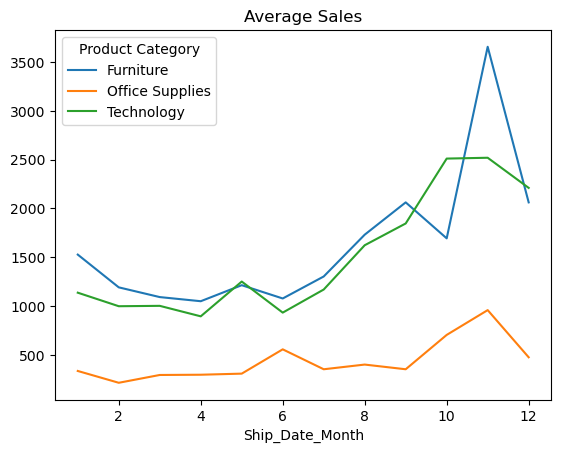

In [ ]:
mydata.pivot_table(index='Ship_Date_Month' , columns='Product Category' , values='Sales' , aggfunc='mean').plot(kind = 'line')
plt.title('Average Sales')

Text(0.5, 1.0, 'Average Sales')

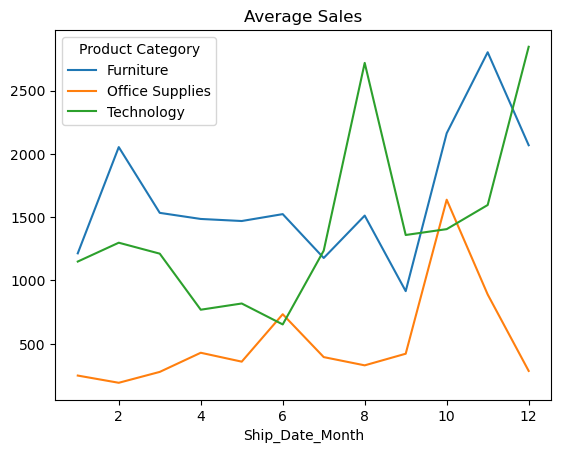

In [ ]:
mydata1.pivot_table(index='Ship_Date_Month' , columns='Product Category' , values='Sales' , aggfunc='mean').plot(kind = 'line')
plt.title('Average Sales')

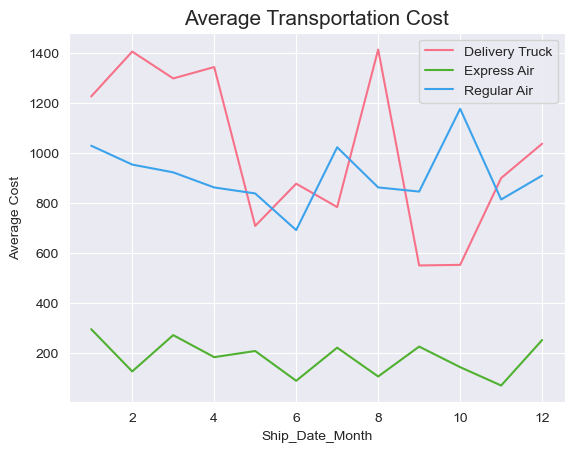

In [ ]:
sns.set_palette('husl',3)
sns.set_style('darkgrid')
mydata1.pivot_table(index='Ship_Date_Month' , columns='Ship Mode' , values='Shipping Cost' , aggfunc='sum').plot(kind='line')
plt.title('Average Transportation Cost' , fontsize =15)
plt.ylabel('Average Cost')
plt.legend()
plt.show()

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

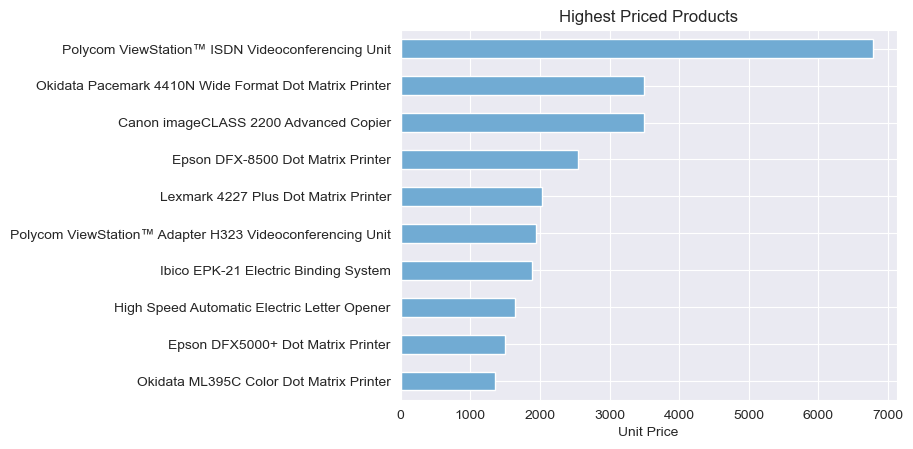

In [ ]:
sns.set_palette('Blues_d',3)
sns.set_style('darkgrid')
mydata.groupby('Product Name')['Unit Price'].max().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.title('Highest Priced Products')
plt.xlabel('Unit Price')
plt.ylabel('')
plt.show()

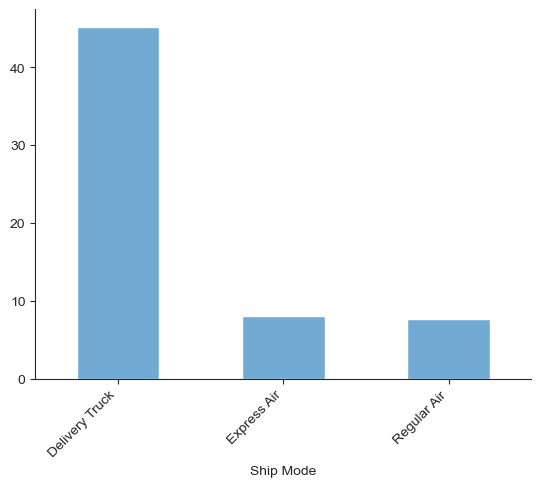

In [ ]:
sns.set_palette('Blues_d',3)
sns.set_style('ticks')
mydata.groupby('Ship Mode')['Shipping Cost'].mean().plot(kind='bar')
plt.xticks(rotation = 45 , ha = 'right')
sns.despine()

<AxesSubplot:xlabel='Ship_Date_Year'>

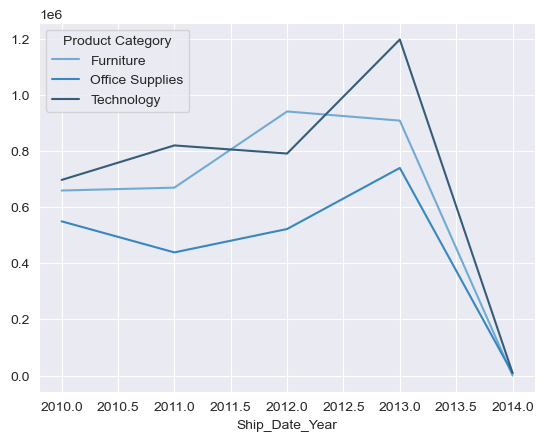

In [ ]:
mydata.pivot_table(index='Ship_Date_Year' , columns = 'Product Category', values='Sales' , aggfunc='sum').plot(kind = 'line')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/data/archive (3)/car_prices.csv')
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
data_piv = data.pivot_table(index='year' , columns='make' , values='sellingprice' , aggfunc='sum' , fill_value=0)
data_piv

make,Acura,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Daewoo,...,oldsmobile,plymouth,pontiac,porsche,smart,subaru,suzuki,toyota,volkswagen,vw
year,,,,,,,,,,,,,,,,,,,,,
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1075,0,0
1990,0,0,0,0,0,0,325,40400,0,0,...,0,0,0,0,0,0,0,0,0,0
1991,0,0,0,6750,0,500,2250,11200,0,0,...,0,0,0,0,0,0,0,1725,0,0
1992,0,0,0,450,0,4750,2250,17075,0,0,...,0,0,0,0,0,0,0,0,0,0
1993,1150,0,0,0,0,825,6650,13100,0,0,...,2050,0,0,0,0,0,0,0,0,0


In [ ]:
data_piv.loc['Total'] = data_piv.sum()
data_piv

make,Acura,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Daewoo,...,oldsmobile,plymouth,pontiac,porsche,smart,subaru,suzuki,toyota,volkswagen,vw
year,,,,,,,,,,,,,,,,,,,,,
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1075,0,0
1990,0,0,0,0,0,0,325,40400,0,0,...,0,0,0,0,0,0,0,0,0,0
1991,0,0,0,6750,0,500,2250,11200,0,0,...,0,0,0,0,0,0,0,1725,0,0
1992,0,0,0,450,0,4750,2250,17075,0,0,...,0,0,0,0,0,0,0,0,0,0
1993,1150,0,0,0,0,825,6650,13100,0,0,...,2050,0,0,0,0,0,0,0,0,0


In [ ]:
data_piv.loc['Total'] = data_piv.loc['Total'].sort_values(ascending=False)

In [ ]:
data_piv

make,Acura,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Daewoo,...,plymouth,pontiac,porsche,smart,subaru,suzuki,toyota,volkswagen,vw,Total
year,,,,,,,,,,,,,,,,,,,,,
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1075,0,0,NaN
1990,0,0,0,0,0,0,325,40400,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1991,0,0,0,6750,0,500,2250,11200,0,0,...,0,0,0,0,0,0,1725,0,0,NaN
1992,0,0,0,450,0,4750,2250,17075,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1993,1150,0,0,0,0,825,6650,13100,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
data_piv.drop(columns='Total' , axis=1 , inplace=True)

In [ ]:
data_piv.drop('Total' , inplace=True)

In [ ]:
data.replace('maserati' ,'Maserati' )

In [ ]:
first_five = data.groupby('make')['sellingprice'].median().sort_values(ascending=False).head(5).index
first_five

Index(['Rolls-Royce', 'Ferrari', 'Lamborghini', 'airstream', 'Tesla'], dtype='object', name='make')

In [ ]:
data_piv[first_five].drop_duplicates()

make,Rolls-Royce,Ferrari,Lamborghini,airstream,Tesla
year,,,,,
1984,0,0,0,0,0
2004,0,81000,0,0,0
2005,0,109000,0,0,0
2007,0,213000,334500,0,0
2008,0,117000,116000,0,0
2010,585300,732000,0,0,0
2011,1347000,183000,0,0,0
2012,505500,982000,0,71000,0
2013,171500,0,0,0,1195850


In [ ]:
fist10 = data.groupby('make')['sellingprice'].agg(['max' , 'median' , 'mean']).sort_values(by='median' , ascending=False).head(10)

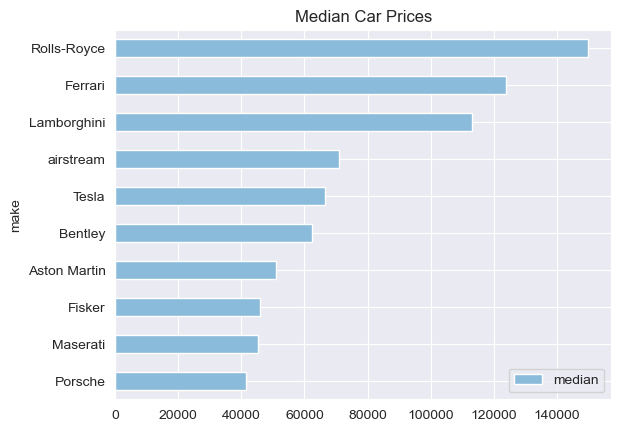

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Blues_d')
fist10.plot(kind = 'barh' , y = 'median')
plt.title('Median Car Prices')
plt.gca().invert_yaxis()
plt.legend()

Text(0.5, 1.0, 'Total Amount of Cars Sold')

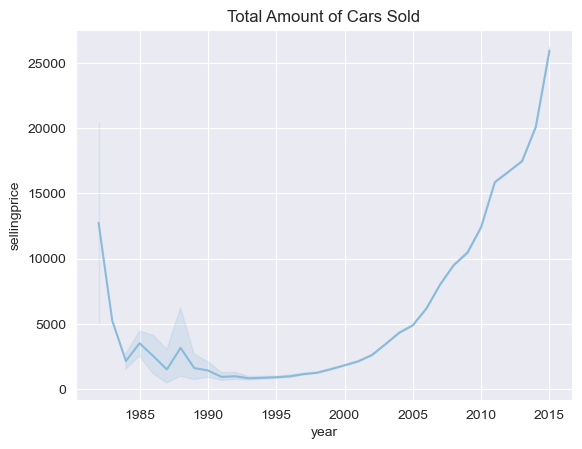

In [ ]:
sns.lineplot(data=data , x = 'year' , y = 'sellingprice')
plt.title('Total Amount of Cars Sold')

In [ ]:
rolls_data = data[data['make']=='Rolls-Royce']
rolls_data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
12948,2010,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s51aux48718,wi,4.0,8440.0,gray,beige,toyota financial services,157000.0,149800.0,Wed Dec 17 2014 10:00:00 GMT-0800 (PST)
125095,2012,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58cux50727,fl,45.0,14316.0,black,beige,braman motorcars,154000.0,169500.0,Wed Jan 14 2015 01:40:00 GMT-0800 (PST)
194349,2011,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s58bux50113,ca,42.0,12912.0,black,black,financial services remarketing (bmw int),166000.0,163000.0,Wed Jan 28 2015 10:00:00 GMT-0800 (PST)
194367,2011,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s51bux49871,ca,4.0,11841.0,gray,off-white,financial services remarketing (bmw int),160000.0,149000.0,Thu Feb 26 2015 04:30:00 GMT-0800 (PST)
194738,2010,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s56aux48701,ca,4.0,19836.0,NaN,NaN,financial services remarketing (bmw int),146000.0,154000.0,Wed Jan 28 2015 10:00:00 GMT-0800 (PST)
227370,2010,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s56aux49041,ca,45.0,10900.0,gray,beige,executive car leasing company,151000.0,141500.0,Thu Feb 26 2015 04:30:00 GMT-0800 (PST)
302792,2011,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s57bux49549,ca,43.0,12601.0,gray,gray,ferrari of orange county,162000.0,143000.0,Thu Feb 12 2015 04:00:00 GMT-0800 (PST)
427510,2011,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s51bux49532,ca,42.0,9134.0,blue,beige,financial services remarketing (bmw int),151000.0,147000.0,Thu May 21 2015 05:30:00 GMT-0700 (PDT)
427514,2011,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s55bux49503,ca,47.0,22761.0,black,beige,financial services remarketing (bmw int),142000.0,155000.0,Thu May 21 2015 05:30:00 GMT-0700 (PDT)
427515,2011,Rolls-Royce,Ghost,Base,Sedan,automatic,sca664s53bux49967,ca,36.0,13695.0,—,tan,financial services remarketing (bmw int),148000.0,147000.0,Thu May 21 2015 05:30:00 GMT-0700 (PDT)


Text(0.5, 1.0, 'Rolls Sales')

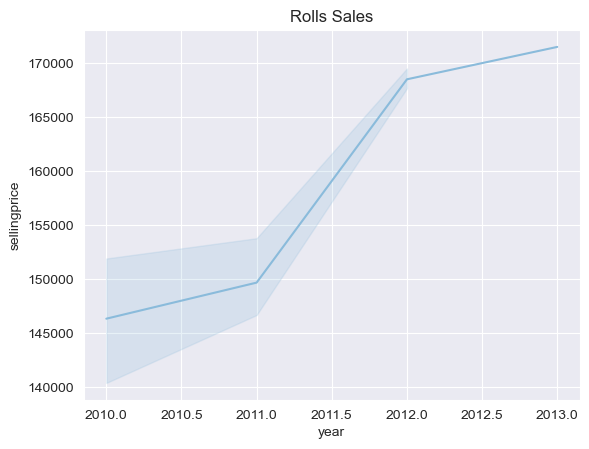

In [ ]:
sns.lineplot(data=rolls_data ,  x = 'year' , y='sellingprice')
plt.title('Rolls Sales')

In [ ]:
new_data = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/data/New_York_City_Leading_Causes_of_Death.csv')
new_data

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96,8,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155,12.9,16
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14,2.5,3.6
...,...,...,...,...,...,...,...
2097,2021,Essential Hypertension and Renal Diseases (I10...,Female,Not Stated/Unknown,10,NaN,NaN
2098,2021,Human Immunodeficiency Viruses Diseases,Female,Not Stated/Unknown,7,NaN,NaN
2099,2021,Diabetes Mellitus (E10-E14),Female,Not Stated/Unknown,7,NaN,NaN
2100,2021,Alzheimer's Disease (G30),Female,Not Stated/Unknown,7,NaN,NaN


In [ ]:
new_data.dropna(subset='Deaths' , inplace=True)

In [ ]:
new_data

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,"Nephritis, Nephrotic Syndrome and Nephrisis (N...",F,Black Non-Hispanic,83,7.9,6.9
1,2009,Human Immunodeficiency Virus Disease (HIV: B20...,F,Hispanic,96,8,8.1
2,2009,Chronic Lower Respiratory Diseases (J40-J47),F,Hispanic,155,12.9,16
3,2008,"Diseases of Heart (I00-I09, I11, I13, I20-I51)",F,Hispanic,1445,122.3,160.7
4,2009,Alzheimer's Disease (G30),F,Asian and Pacific Islander,14,2.5,3.6
...,...,...,...,...,...,...,...
2097,2021,Essential Hypertension and Renal Diseases (I10...,Female,Not Stated/Unknown,10,NaN,NaN
2098,2021,Human Immunodeficiency Viruses Diseases,Female,Not Stated/Unknown,7,NaN,NaN
2099,2021,Diabetes Mellitus (E10-E14),Female,Not Stated/Unknown,7,NaN,NaN
2100,2021,Alzheimer's Disease (G30),Female,Not Stated/Unknown,7,NaN,NaN


In [ ]:
new_piv = new_data.pivot_table(index='Year' , columns='Leading Cause' , values='Deaths' , aggfunc='sum' , fill_value=0)
new_piv

Leading Cause,"Accidents Except Drug Poisoning (V01-X39, X43, X45-X59, Y85-Y86)","Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)",All Other Causes,Alzheimer's Disease (G30),Anemias (D50-D64),Aortic Aneurysm and Dissection (I71),"Assault (Homicide: U01-U02, Y87.1, X85-Y09)","Assault (Homicide: Y87.1, X85-Y09)",Atherosclerosis (I70),Cerebrovascular Disease (Stroke: I60-I69),...,"Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)",Mental and Behavioral Disorders due to Use of Alcohol (F10),"Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)",Parkinson's Disease (G20),Peptic Ulcer (K25-K28),"Pregnancy, Childbirth and the Puerperium (O00-O09)",Septicemia,Septicemia (A40-A41),Tuberculosis (A16-A19),Viral Hepatitis (B15-B19)
Year,,,,,,,,,,,,,,,,,,,,,
2007,0,1622978753.154328158715.,241163123082043988168022127182174915,107.,0,.,0,...267114,.,26737212616456.7.27921370,...,2618710163183,.,1389,0,0,0,0,4989,0,0
2008,0,3668.1861937013272.14653,810691917062384267182412168852141268,151,0,.,0,85286,0,12424515248206267537965.13,...,8617222713,0,711314,0,0,0,0,0,0,6
2009,0,37561341701655.178279,1818261305168410677751155220220181246,1456..79205,0,0,0,2557,.,5227245154143.61.39058154,...,577.14575221,0,.75.,0,0,0,0,.,0,0
2010,0,25271.5413255810163147.,12302034132623827214018308116732251007,8871247,0,0,0,.299,.,140..171.8938283276259.168,...,138211.6,.,86,0,0,0,0,.107,0,..
2011,0,6110..18043184272,21651337340381207102514732724451427838,90.90.23124,0,0,0,266..,0,52001794662907998.281147,...,88145556254135.,0,83.,.,0,0,0,.,.,.
2012,0,2861771155660191.34152,11991483333244478132024231632711092253,222.115126,0,.,0,235..,0,1701292717701016928584169102,...,7173272.,0,2276,0,0,0,0,6.113,0,0
2013,0,.3552716015918916663,229310821391193423979395320259515571341,1202638106.,0,0,0,174,0,771427222191108015814249271,...,62861886321,0,93.,0,0,0,0,16135,0,15
2014,0,421217668664.148258169,22751375119596424257811355933948741536,123.14227626,0,0,0,186,0,1074181659119781122202742778,...,123141916,0,9028,0,0,0,0,8118,0,0
2015,34651911641782871,0,34511841599248992134541196141822881277,50176147378141170,0,0,0,1963,1,951973074221539017820631618,...,781261155342113,1,7911,30,0,0,0,1271,0,2


In [ ]:
new_data.groupby('Leading Cause')['Deaths'].sum().sort_values(ascending=False).head(5)

Leading Cause
Human Immunodeficiency Virus Disease (HIV: B20-B24)                                                                                  96196162248952231896708.13627792196.9122356103...
Chronic Liver Diseases and Cirrhosis                                                                                                                                               916
Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)    8612788626128617287102275714516313851737183.31...
Essential Hypertension and Renal Diseases (I10, I12)                                                                                 8478321031239.1512218.227525.148104166.5046311...
Nephritis, Nephrotic Syndrome and Nephrisis (N00-N07, N17-N19, N25-N27)                                                                    83.9013712813938675..89142276.7911130809625
Name: Deaths, dtype: object

In [ ]:
new_data.groupby('Race Ethnicity')['Deaths'].sum().round()


Race Ethnicity
Asian and Pacific Islander    1436421325366432452953722533514805544785062261...
Black Non-Hispanic            8390170308207718412371174248123011633072018713...
Hispanic                      9615514451208411612496918719614078681291032091...
Non-Hispanic Black            2344187239230726123222314792791599203315233452...
Non-Hispanic White            4494313052150342237823922619112724894015302044...
Not Stated/Unknown            810682109.886.2651.89115975.24.9411.6.10478191...
Other Race/ Ethnicity         .3311..247.36.57..58725125.7.6318511.34..822.8...
White Non-Hispanic            2863712671773453438245181816261422932275313286...
Name: Deaths, dtype: object

In [ ]:
fifa = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/fifa.csv')
fifa

,Date,ARG,BRA,ESP,FRA,GER,ITA
0,1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1,1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
2,1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
3,1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
4,1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0
...,...,...,...,...,...,...,...
281,2018-02-15,4.0,2.0,6.0,9.0,1.0,14.0
282,2018-03-15,4.0,2.0,6.0,9.0,1.0,14.0
283,2018-04-12,5.0,2.0,8.0,7.0,1.0,20.0
284,2018-05-17,5.0,2.0,8.0,7.0,1.0,20.0


In [ ]:
fifa['Date'] = pd.to_datetime(fifa['Date'])
fifa['Year'] = fifa['Date'].dt.year

In [ ]:
del fifa['Date']

In [ ]:
fifa.set_index('Year' , inplace=True)

<AxesSubplot:xlabel='Year'>

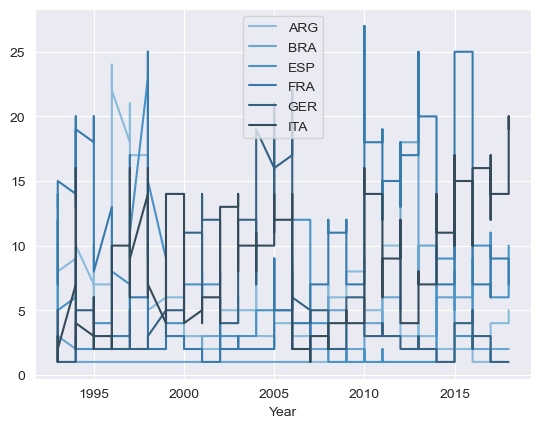

In [ ]:
fifa.plot(kind = 'line')

In [ ]:
fifa = fifa.reset_index()

In [ ]:
print(data['sellingprice'].idxmax());print(data['sellingprice'].idxmin())

344905
7566


In [ ]:
data.loc[344905]

year                                               2014
make                                               Ford
model                                            Escape
trim                                           Titanium
body                                                SUV
transmission                                  automatic
vin                                   1fmcu9j98eua23833
state                                                mo
condition                                          43.0
odometer                                        27802.0
color                                             green
interior                                            tan
seller                      ford-lincoln dealer program
mmr                                             22800.0
sellingprice                                   230000.0
saledate        Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
Name: 344905, dtype: object

In [ ]:
data.loc[7566]

year                                               2002
make                                               Ford
model                                  F-350 Super Duty
trim                                                XLT
body                                           Crew Cab
transmission                                        NaN
vin                                   1ftsw31f52ed16477
state                                                ca
condition                                           2.0
odometer                                            NaN
color                                             white
interior                                           gray
seller                                      laa leasing
mmr                                              7850.0
sellingprice                                        1.0
saledate        Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
Name: 7566, dtype: object

In [ ]:
data

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [ ]:
data.query("make=='Ford' and color in ['white' , 'black']")

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
12,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0hdxfr145753,ca,2.0,5559.0,white,beige,enterprise vehicle exchange / tra / rental / t...,15350.0,12000.0,Tue Jan 13 2015 12:00:00 GMT-0800 (PST)
94,2015,Ford,Fusion,SE,Sedan,automatic,3fa6p0h7xfr151689,ca,1.0,4205.0,white,black,enterprise vehicle exchange / tra / rental / t...,14700.0,12000.0,Wed Dec 17 2014 15:05:00 GMT-0800 (PST)
938,2012,Ford,E-Series Wagon,E-350 Super Duty XL,Van,NaN,1fbss3bl8cdb20464,ca,2.0,42804.0,white,gray,enterprise vehicle exchange / tra / rental / t...,16150.0,16000.0,Thu Dec 18 2014 11:30:00 GMT-0800 (PST)
945,2012,Ford,Edge,SEL,SUV,automatic,2fmdk4jc4cba12890,ca,46.0,41115.0,white,gray,ford motor credit company llc pd,19800.0,22100.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
953,2012,Ford,Focus,Titanium,Hatchback,automatic,1fahp3n22cl337238,ca,39.0,29499.0,black,black,ford motor credit company llc pd,12900.0,14900.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558733,2012,Ford,Transit Connect,Cargo Van XLT,minivan,automatic,nm0ls6bnxct089062,pa,42.0,114260.0,white,black,usautoland inc,8875.0,8500.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
558738,2008,Ford,F-250 Super Duty,Lariat,crew cab,automatic,1ftsw21rx8ea22277,nv,33.0,125628.0,black,beige,bul connections llc,21000.0,18700.0,Fri Jun 19 2015 04:45:00 GMT-0700 (PDT)
558751,2005,Ford,Escape,XLT,suv,automatic,1fmyu931x5ka48869,fl,41.0,88565.0,white,gray,napletons north palm auto park inc,3900.0,5500.0,Tue Jun 23 2015 08:00:00 GMT-0700 (PDT)
558785,2004,Ford,Expedition,XLT,suv,automatic,1fmru15w64la02138,fl,35.0,108286.0,white,gray,prestige leasing and sales inc,4325.0,5100.0,Wed Jun 24 2015 02:30:00 GMT-0700 (PDT)


In [ ]:
data.query("'BMW' in make")

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
19,2014,BMW,6 Series,650i,Convertible,automatic,wbayp9c53ed169260,ca,34.0,8819.0,black,black,the hertz corporation,68000.0,67200.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
21,2014,BMW,5 Series,528i,Sedan,automatic,wba5a5c51ed501631,ca,29.0,25969.0,black,black,financial services remarketing (lease),34200.0,30000.0,Tue Feb 03 2015 04:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558781,2006,BMW,3 Series,330i,Sedan,automatic,wbavb335x6ks34097,mo,25.0,113941.0,black,black,century sales & leasing inc,7000.0,9300.0,Tue Jul 07 2015 08:00:00 GMT-0700 (PDT)
558783,2003,BMW,3 Series,330i,Sedan,automatic,wbaev53413km28443,ca,37.0,124583.0,silver,—,central auto sales inc,3425.0,4500.0,Wed Jul 08 2015 09:05:00 GMT-0700 (PDT)
558808,2008,BMW,1 Series,135i,Convertible,automatic,wbaun93588vf56134,ca,33.0,96344.0,red,black,autonet trading,12500.0,13000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)


In [ ]:
data['transmission'].value_counts()

automatic    475915
manual        17544
sedan            15
Sedan            11
Name: transmission, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [ ]:
from IPython.display import display, Math, Latex
display(Math(r'\mathcal{Tutorial\ 22/10/2024}'))

<IPython.core.display.Math object>

In [ ]:
data_jobs = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/data_jobs.csv')

In [ ]:
data_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785727 non-nu

In [ ]:
data_jobs['job_posted_date'] = pd.to_datetime(data_jobs['job_posted_date'])

In [ ]:
import ast

In [ ]:
data_jobs['job_skills']= data_jobs['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
len(data_jobs)

785741

In [ ]:
data_jobs.shape

(785741, 17)

In [ ]:
data_jobs.query("'Data Analyst' in job_title_short and salary_year_avg>100000")

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
1555,Data Analyst,Data Analyst/Engineer (M/F/D),"Aveiro, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-04-25 13:27:25,False,False,Portugal,year,111175.0,NaN,Bosch Group,"[databricks, spark]","{'cloud': ['databricks'], 'libraries': ['spark']}"
1681,Data Analyst,Data Analyst,"Irvine, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-03-23 13:01:14,False,True,United States,year,111175.0,NaN,Western Digital,"[sql, tableau, power bi, excel]","{'analyst_tools': ['tableau', 'power bi', 'exc..."
1684,Data Analyst,Data Analyst - Data17829,"Tampa, FL",via Indeed,Full-time,False,"Florida, United States",2023-07-18 13:02:09,True,True,United States,year,120000.0,NaN,Acrisure,"[shell, sql, azure, databricks, linux]","{'cloud': ['azure', 'databricks'], 'os': ['lin..."
1867,Data Analyst,Data Integration Analyst (West Coast/Chicago),"Chicago, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-07-18 13:01:47,False,False,United States,year,101500.0,NaN,Forsta,"[php, python, express]","{'programming': ['php', 'python'], 'webframewo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,"[sql, python, r, looker]","{'analyst_tools': ['looker'], 'programming': [..."


In [ ]:
data_jobs.groupby('job_title_short')['salary_year_avg'].median()

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [ ]:
data_jobs.groupby(['job_title_short' , 'job_country'])['salary_year_avg'].median()

job_title_short    job_country
Business Analyst   Afghanistan        NaN
                   Albania            NaN
                   Algeria            NaN
                   Angola             NaN
                   Argentina      71100.0
                                   ...   
Software Engineer  Venezuela          NaN
                   Vietnam        53600.0
                   Yemen              NaN
                   Zambia             NaN
                   Zimbabwe           NaN
Name: salary_year_avg, Length: 1387, dtype: float64

In [ ]:
data_jobs.groupby('job_title_short')[['salary_year_avg', 'salary_hour_avg']].median()

,salary_year_avg,salary_hour_avg
job_title_short,,
Business Analyst,85000.0,40.362499
Cloud Engineer,90000.0,40.000000
Data Analyst,90000.0,32.615002
Data Engineer,125000.0,58.500000
Data Scientist,127500.0,47.500000
Machine Learning Engineer,106415.0,47.535000
Senior Data Analyst,111175.0,47.500000
Senior Data Engineer,147500.0,61.500000
Senior Data Scientist,155500.0,47.620003


In [ ]:
data_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min' , 'max' , 'median'])

,min,max,median
job_title_short,,,
Business Analyst,16500.0,387460.0,85000.0
Cloud Engineer,42000.0,280000.0,90000.0
Data Analyst,25000.0,650000.0,90000.0
Data Engineer,15000.0,525000.0,125000.0
Data Scientist,27000.0,960000.0,127500.0
Machine Learning Engineer,30000.0,325000.0,106415.0
Senior Data Analyst,30000.0,425000.0,111175.0
Senior Data Engineer,35000.0,425000.0,147500.0
Senior Data Scientist,45000.0,890000.0,155500.0


In [ ]:
data_jobs['job_country'].isin(['Zimbabwe']).any()

True

In [ ]:
us_jobs = data_jobs[data_jobs['job_country']=='United States']
us_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,NaN,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,NaN,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,NaN,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,NaN,NaN,NaN,JPMorgan Chase & Co.,NaN,NaN
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,NaN,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN


In [ ]:
us_jobs = us_jobs[us_jobs['salary_year_avg'].notna()]

In [ ]:
us_jobs.groupby('job_title_short')['salary_year_avg'].agg(['median' , 'min' , 'max' , 'count']).sort_values(by = 'median' , ascending=False)

,median,min,max,count
job_title_short,,,,
Senior Data Scientist,155000.0,55000.0,475000.0,1241
Machine Learning Engineer,150000.0,44408.5,315000.0,128
Senior Data Engineer,150000.0,45000.0,375000.0,1058
Data Scientist,130000.0,30000.0,960000.0,4553
Software Engineer,130000.0,48982.0,375000.0,157
Data Engineer,125000.0,23496.0,525000.0,2915
Cloud Engineer,116100.0,42000.0,221844.0,20
Senior Data Analyst,110000.0,35360.0,425000.0,913
Business Analyst,90000.0,35000.0,387460.0,431


In [ ]:
data_jobs['job_poated_month'] = data_jobs['job_posted_date'].dt.month


In [ ]:
monthly_count = data_jobs['job_poated_month'].value_counts()
monthly_count = monthly_count.sort_index()
monthly_count

1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: job_poated_month, dtype: int64

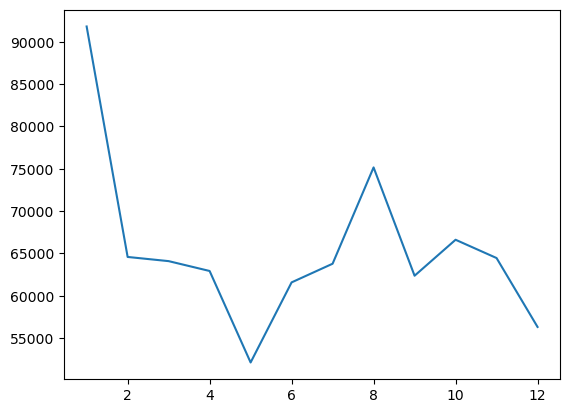

In [ ]:
plt.plot(monthly_count.index , monthly_count)

In [ ]:
data_jobs['job_poated_mon'] = data_jobs['job_posted_date'].dt.strftime('%b')

<AxesSubplot:ylabel='job_title_short'>

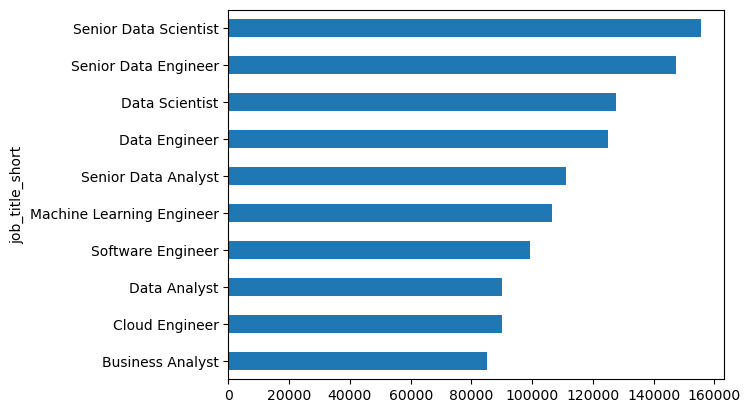

In [ ]:
data_jobs.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True).plot(kind = 'barh')


In [ ]:
median_salary_year = data_jobs['salary_year_avg'].median()
median_salary_hr = data_jobs['salary_hour_avg'].median()


In [ ]:
data_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_poated_month,job_poated_mon
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN,6,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1,Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10,Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7,Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete...",3,Mar
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi...",3,Mar
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}",3,Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3,Mar


In [ ]:
data_jobs['salary_year_avg'] = data_jobs['salary_year_avg'].fillna(median_salary_year)
data_jobs['salary_hour_avg'] = data_jobs['salary_hour_avg'].fillna(median_salary_hr)

In [ ]:
data_jobs[['salary_hour_avg' , 'salary_year_avg']]


,salary_hour_avg,salary_year_avg
0,45.98,115000.0
1,45.98,115000.0
2,45.98,115000.0
3,45.98,115000.0
4,45.98,115000.0
...,...,...
785736,45.98,115000.0
785737,45.98,115000.0
785738,45.98,115000.0
785739,45.98,115000.0


In [ ]:
data_jobs_piv = data_jobs.pivot_table(values='salary_year_avg' ,  columns= 'job_title_short',index='job_country' , aggfunc='median')

In [ ]:
top_country = data_jobs['job_country'].value_counts().head(6).index
top_country

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object')

In [ ]:
newdata = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/Real_Estate_Sales_2001-2022_GL.csv')
newdata.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10116\335750593.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  newdata = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/Real_Estate_Sales_2001-2022_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.5992,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN


In [ ]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


In [ ]:
newdata.query("Town == 'Avon'")

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
5,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
6,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN
8,200109,2020,12/09/2020,Avon,57 FAR HILLS DRIVE,847520.0,1250000.0,0.6780,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081223,190366,2019,08/17/2020,Avon,516 LOVELY STREET,153280.0,270000.0,0.5677,Single Family,Single Family,07 - Change in Property,NaN,TOTAL RENOVATION PER MLS - SEE PREVIOUS SALE #...,NaN
1081260,190019,2019,10/08/2019,Avon,3 COTTONWOOD DRIVE,109470.0,162000.0,0.6757,Condo,Condo,NaN,NaN,NaN,NaN
1081909,190410,2019,09/14/2020,Avon,117 HAYNES ROAD,214720.0,390000.0,0.5506,Single Family,Single Family,NaN,NaN,NaN,NaN
1082164,190320,2019,07/14/2020,Avon,559 WEST AVON ROAD,302060.0,428500.0,0.7049,Single Family,Single Family,NaN,NaN,NaN,NaN


In [ ]:
real_piv = newdata.pivot_table(index = 'List Year' , columns='Property Type' , values='Sale Amount',  aggfunc='median' )
real_piv

Property Type,Apartments,Commercial,Condo,Four Family,Industrial,Public Utility,Residential,Single Family,Three Family,Two Family,Vacant Land
List Year,,,,,,,,,,,
2006,NaN,NaN,197500.0,276750.0,NaN,NaN,NaN,303000.0,240000.0,235000.0,NaN
2007,NaN,NaN,200000.0,243000.0,NaN,NaN,NaN,270000.0,205000.0,200000.0,NaN
2008,NaN,NaN,178589.5,143000.0,NaN,NaN,NaN,238000.0,103000.0,145000.0,NaN
2009,NaN,NaN,180000.0,128830.5,NaN,NaN,NaN,247000.0,105000.0,138800.0,NaN
2010,NaN,NaN,171000.0,123500.0,NaN,NaN,NaN,239000.0,95000.0,125000.0,NaN
2011,NaN,NaN,165000.0,119000.0,NaN,NaN,NaN,245000.0,105000.0,120000.0,NaN
2012,NaN,NaN,170000.0,160000.0,NaN,NaN,NaN,246000.0,117000.0,127500.0,NaN
2013,NaN,NaN,164700.0,172500.0,NaN,NaN,NaN,232000.0,110000.0,130000.0,NaN
2014,NaN,NaN,165000.0,160000.0,NaN,NaN,NaN,236900.0,122000.0,138000.0,NaN


In [ ]:
real_piv.loc['Total'] = real_piv.sum()
real_piv

Property Type,Apartments,Commercial,Condo,Four Family,Industrial,Public Utility,Residential,Single Family,Three Family,Two Family,Vacant Land
List Year,,,,,,,,,,,
2006,NaN,NaN,197500.0,276750.0,NaN,NaN,NaN,303000.0,240000.0,235000.0,NaN
2007,NaN,NaN,200000.0,243000.0,NaN,NaN,NaN,270000.0,205000.0,200000.0,NaN
2008,NaN,NaN,178589.5,143000.0,NaN,NaN,NaN,238000.0,103000.0,145000.0,NaN
2009,NaN,NaN,180000.0,128830.5,NaN,NaN,NaN,247000.0,105000.0,138800.0,NaN
2010,NaN,NaN,171000.0,123500.0,NaN,NaN,NaN,239000.0,95000.0,125000.0,NaN
2011,NaN,NaN,165000.0,119000.0,NaN,NaN,NaN,245000.0,105000.0,120000.0,NaN
2012,NaN,NaN,170000.0,160000.0,NaN,NaN,NaN,246000.0,117000.0,127500.0,NaN
2013,NaN,NaN,164700.0,172500.0,NaN,NaN,NaN,232000.0,110000.0,130000.0,NaN
2014,NaN,NaN,165000.0,160000.0,NaN,NaN,NaN,236900.0,122000.0,138000.0,NaN


In [ ]:
top_estates = real_piv.loc['Total'].sort_values(ascending= False).head(6).index
top_estates = top_estates.tolist()

In [ ]:
real_piv.drop('Total', axis = 0 , inplace = True)


<AxesSubplot:xlabel='List Year'>

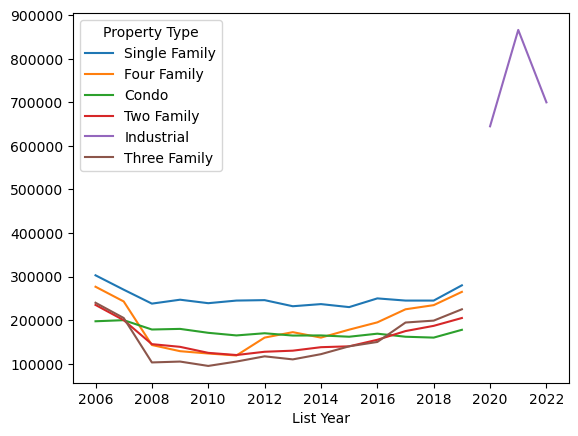

In [ ]:
real_piv[top_estates].plot(kind='line')

In [ ]:
newdata

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,220008,2022,01/30/2023,Andover,618 ROUTE 6,139020.0,232000.0,0.599200,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984)
1,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
2,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
3,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
4,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
1097625,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
1097626,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
1097627,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


In [ ]:
from IPython.display import display, Math, Latex
display(Math(r'\mathcal{Trend \ Of\ Sales\ In\ 2020}'))

<IPython.core.display.Math object>

In [ ]:
newdata['Date Recorded']=  pd.to_datetime(newdata['Date Recorded'])
newdata['Date_Recorded_year'] = newdata['Date Recorded'].dt.year



In [ ]:
newdata['Date_Recorded_month'] =newdata['Date Recorded'].dt.month

In [ ]:
newdata['Date_Recorded_mon'] =newdata['Date Recorded'].dt.strftime('%b')

In [ ]:
sales2020 = newdata[newdata['Date_Recorded_year']==2020]
sales2020.sort_values(by ='Date_Recorded_month' , ascending=True  , inplace = True)

C:\Users\user\AppData\Local\Temp\ipykernel_10116\3157670039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2020.sort_values(by ='Date_Recorded_month' , ascending=True  , inplace = True)


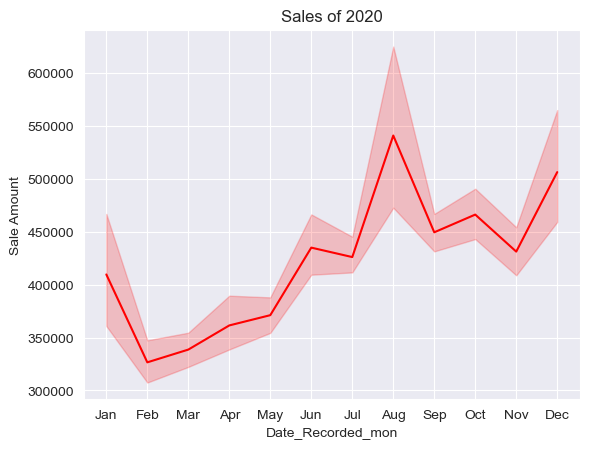

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(data = sales2020 , x ='Date_Recorded_mon' , y = 'Sale Amount', color = 'red' )
plt.title('Sales of 2020')
plt.show()

Text(0.5, 1.0, 'Most Valued Properties 2020')

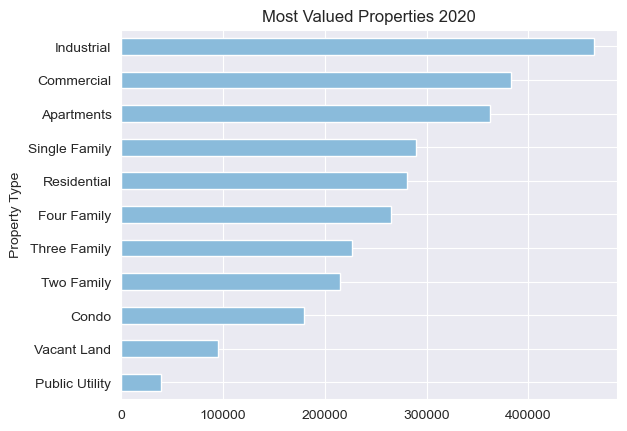

In [ ]:
sns.set_palette('Blues_d')
sales2020.groupby('Property Type')['Sale Amount'].median().sort_values(ascending=True).plot(kind = 'barh')
plt.title('Most Valued Properties 2020')


<AxesSubplot:xlabel='Date_Recorded_mon', ylabel='Assessed Value'>

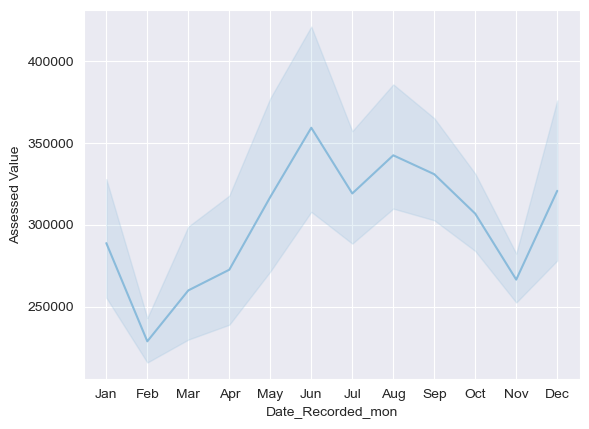

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(data = sales2020 , x ='Date_Recorded_mon' , y = 'Assessed Value' )

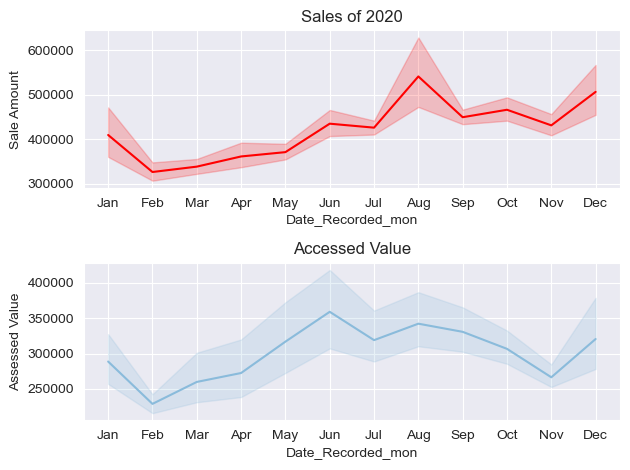

In [ ]:
fig, ax = plt.subplots(2,1)

sns.set_style('darkgrid')
sns.lineplot(data = sales2020 , x ='Date_Recorded_mon' , y = 'Sale Amount', color = 'red' , ax = ax[0] )
ax[0].set_title('Sales of 2020')

sns.lineplot(data = sales2020 , x ='Date_Recorded_mon' , y = 'Assessed Value'  , ax = ax[1])
ax[1].set_title('Accessed Value')
fig.tight_layout()
plt.show()


### Overall Trend of Sales


Text(0, 0.5, 'Value($USD)')

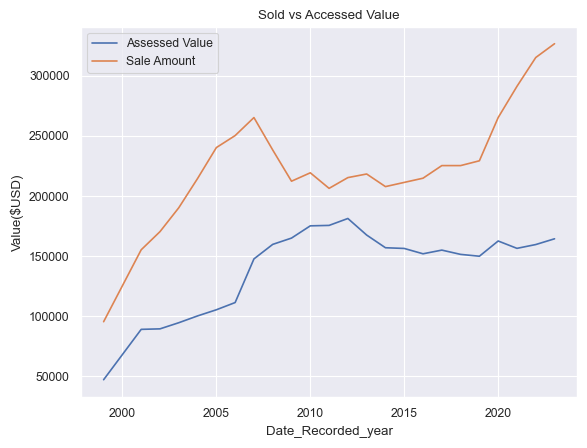

In [ ]:
sns.set_theme("paper")
newdata.groupby('Date_Recorded_year')[['Assessed Value','Sale Amount']].median().plot(kind = 'line')
plt.title('Sold vs Accessed Value')
plt.ylabel('Value($USD)')

In [ ]:
newdata


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Date_Recorded_month,Date_Recorded_year,Date_Recorded_mon
0,220008,2022,2023-01-30,Andover,618 ROUTE 6,139020.0,232000.0,0.599200,Residential,Single Family,NaN,NaN,NaN,POINT (-72.343628962 41.728431984),1.0,2023.0,Jan
1,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN,9.0,2021.0,Sep
2,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN,10.0,2020.0,Oct
3,210317,2021,2022-07-05,Avon,53 COTSWOLD WAY,329730.0,805000.0,0.409600,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018),7.0,2022.0,Jul
4,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN,3.0,2021.0,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,190272,2019,2020-06-24,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN,6.0,2020.0,Jun
1097625,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN,11.0,2019.0,Nov
1097626,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN,4.0,2020.0,Apr
1097627,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN,6.0,2020.0,Jun


<AxesSubplot:xlabel='Date_Recorded_year', ylabel='Sales Ratio'>

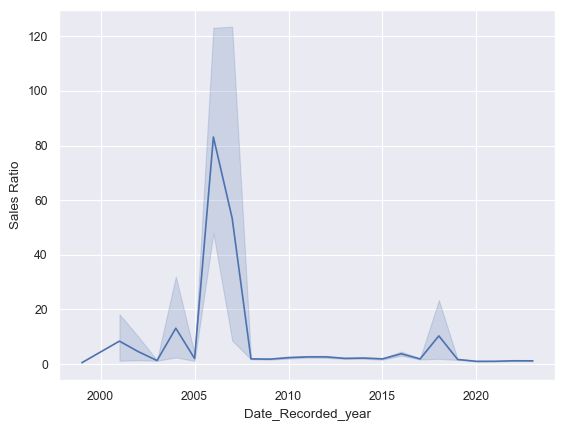

In [ ]:
sns.lineplot(data = newdata , x = 'Date_Recorded_year' , y = 'Sales Ratio')

#### Unemployed Data

In [ ]:
unemp_data = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/unemployment analysis.csv')
unemp_data.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [ ]:
del unemp_data['Country Code']

In [ ]:
unemp_data.set_index('Country Name' , inplace=True)

In [ ]:
unemp_data = unemp_data.T
unemp_data

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1991,7.80,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.60,9.58,...,9.45,12.35,2.09,1.68,4.80,2.10,8.32,29.95,18.90,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.80,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.10,5.30,10.87,...,6.60,12.70,1.97,1.73,5.23,2.63,8.35,29.92,19.70,4.97
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.60,9.72,...,8.56,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96
1995,7.83,11.18,4.53,4.11,14.61,13.32,1.80,18.80,6.70,8.47,...,10.24,12.13,1.90,1.74,5.63,3.19,8.96,29.89,16.81,5.63
1996,7.84,10.96,4.57,4.10,13.93,12.38,1.90,17.11,9.30,8.51,...,11.77,12.21,1.93,1.72,5.70,3.47,9.59,29.87,15.30,6.25
1997,7.86,10.78,4.60,4.09,16.88,11.95,1.98,14.82,10.80,8.36,...,11.16,12.12,2.87,1.68,5.70,3.90,10.20,29.91,13.64,6.93
1998,7.81,10.80,4.66,4.07,20.05,11.97,2.14,12.65,9.40,7.68,...,11.15,11.86,2.29,1.76,5.86,4.18,10.81,29.95,12.00,6.46
1999,7.79,10.81,4.86,4.05,20.84,12.11,2.22,14.05,11.20,6.87,...,14.53,11.50,2.33,1.78,5.97,4.48,11.46,29.91,12.44,6.00
2000,7.72,10.81,4.92,4.03,19.03,12.60,2.25,15.00,11.05,6.28,...,13.99,11.11,2.26,1.69,5.77,4.66,11.56,29.88,12.93,5.69


In [ ]:
unemp_data.reset_index(inplace=True)

In [ ]:
unemp_data.set_index('index' , inplace=True)

In [ ]:
unemp_data

Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
index,,,,,,,,,,,,,,,,,,,,,
1991,7.80,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.60,9.58,...,9.45,12.35,2.09,1.68,4.80,2.10,8.32,29.95,18.90,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.80,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.10,5.30,10.87,...,6.60,12.70,1.97,1.73,5.23,2.63,8.35,29.92,19.70,4.97
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.60,9.72,...,8.56,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96
1995,7.83,11.18,4.53,4.11,14.61,13.32,1.80,18.80,6.70,8.47,...,10.24,12.13,1.90,1.74,5.63,3.19,8.96,29.89,16.81,5.63
1996,7.84,10.96,4.57,4.10,13.93,12.38,1.90,17.11,9.30,8.51,...,11.77,12.21,1.93,1.72,5.70,3.47,9.59,29.87,15.30,6.25
1997,7.86,10.78,4.60,4.09,16.88,11.95,1.98,14.82,10.80,8.36,...,11.16,12.12,2.87,1.68,5.70,3.90,10.20,29.91,13.64,6.93
1998,7.81,10.80,4.66,4.07,20.05,11.97,2.14,12.65,9.40,7.68,...,11.15,11.86,2.29,1.76,5.86,4.18,10.81,29.95,12.00,6.46
1999,7.79,10.81,4.86,4.05,20.84,12.11,2.22,14.05,11.20,6.87,...,14.53,11.50,2.33,1.78,5.97,4.48,11.46,29.91,12.44,6.00


In [ ]:
high_unmp = unemp_data.sum().sort_values(ascending=False).head(6).index
high_unmp = high_unmp.tolist()
high_unmp

['Lesotho',
 'North Macedonia',
 'South Africa',
 'Djibouti',
 'Eswatini',
 'Bosnia and Herzegovina']

In [ ]:
low_unmp = unemp_data.sum().sort_values(ascending=True).head(6).index
low_unmp = low_unmp.tolist()
low_unmp

['Qatar', 'Cambodia', 'Myanmar', 'Rwanda', 'Chad', 'Bahrain']

<AxesSubplot:xlabel='index'>

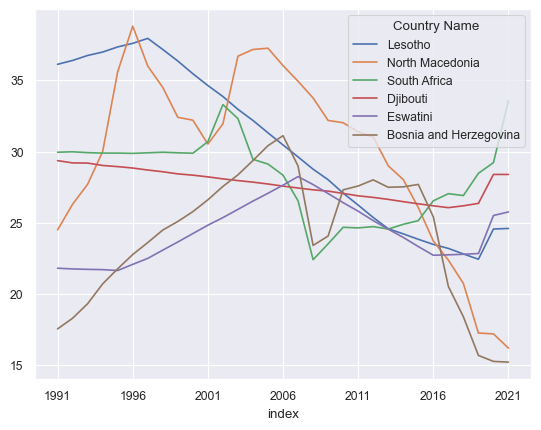

In [ ]:
unemp_data[high_unmp].plot(kind=  'line')

<AxesSubplot:xlabel='index'>

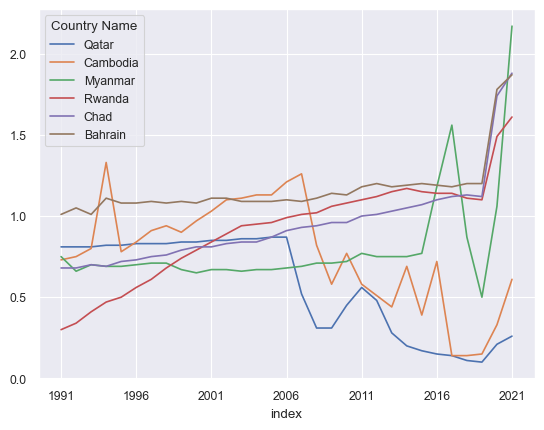

In [ ]:
unemp_data[low_unmp].plot(kind=  'line')

### Electric Cars

In [ ]:
elec_cars = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/Electric_Vehicle_Population_Data.csv')

In [ ]:
elec_cars

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205434,1N4BZ1CV2N,Chelan,Peshastin,WA,98847.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,12.0,187384494,POINT (-120.6051696 47.5510173),PUD NO 1 OF CHELAN COUNTY,5.300796e+10
205435,1FTVW1EV0P,Snohomish,Everett,WA,98208.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,44.0,255036386,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10
205436,5YJXCDE22H,Spokane,Cheney,WA,99004.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,6.0,221631588,POINT (-117.5836098 47.4951312),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
205437,5YJ3E1EA3J,King,Vashon,WA,98070.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,34.0,336983496,POINT (-122.466938 47.429244),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [ ]:
elec_cars.groupby('Make')['Electric Range'].max().sort_values(ascending=False)

Make
TESLA                   337.0
CHEVROLET               259.0
HYUNDAI                 258.0
KIA                     239.0
JAGUAR                  234.0
POLESTAR                233.0
AUDI                    222.0
NISSAN                  215.0
PORSCHE                 203.0
BMW                     153.0
VOLKSWAGEN              125.0
MINI                    110.0
TOYOTA                  103.0
WHEEGO ELECTRIC CARS    100.0
TH!NK                   100.0
FORD                    100.0
MERCEDES-BENZ            87.0
FIAT                     87.0
SMART                    68.0
MITSUBISHI               62.0
LAND ROVER               59.0
AZURE DYNAMICS           56.0
HONDA                    48.0
VOLVO                    41.0
CADILLAC                 40.0
LEXUS                    37.0
ALFA ROMEO               33.0
FISKER                   33.0
CHRYSLER                 33.0
DODGE                    32.0
LINCOLN                  28.0
BENTLEY                  28.0
MAZDA                    26.0
JEEP 

In [ ]:
elec_cars.query("Make == 'MERCEDES-BENZ' and City =='Vancouver' ")

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
258,4JGGM5DB3R,Clark,Vancouver,WA,98682.0,2024,MERCEDES-BENZ,EQE-CLASS SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,17.0,264390073,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
2674,W1KEG2CB3P,Clark,Vancouver,WA,98682.0,2023,MERCEDES-BENZ,EQE-CLASS SEDAN,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,17.0,265182004,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
2903,WDC0G5EB1K,Clark,Vancouver,WA,98685.0,2019,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,10.0,0.0,18.0,227222075,POINT (-122.688741 45.711311),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
5131,W1N9M0CB4P,Clark,Vancouver,WA,98664.0,2023,MERCEDES-BENZ,EQB-CLASS,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,49.0,258010798,POINT (-122.575383 45.620105),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
6940,4JGDM2EB8P,Clark,Vancouver,WA,98684.0,2023,MERCEDES-BENZ,EQS-CLASS SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,17.0,264709175,POINT (-122.5241377 45.6278995),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181997,4JGFB4GB0R,Clark,Vancouver,WA,98683.0,2024,MERCEDES-BENZ,GLE-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,48.0,0.0,17.0,255987728,POINT (-122.515805 45.604689),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
181998,W1N0G5DB7L,Clark,Vancouver,WA,98682.0,2020,MERCEDES-BENZ,GLC-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,0.0,17.0,225836502,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
185064,4JGDM4EB8P,Clark,Vancouver,WA,98665.0,2023,MERCEDES-BENZ,EQS-CLASS SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,49.0,265812914,POINT (-122.6615789 45.6809862),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10
193872,4JGGM1CB9R,Clark,Vancouver,WA,98682.0,2024,MERCEDES-BENZ,EQE-CLASS SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,17.0,263306641,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [ ]:
elec_cars['Electric Range'].idxmax()

429

In [ ]:
elec_cars['Electric Range'].idxmin()

7

In [ ]:
elec_cars.loc[429]

VIN (1-10)                                                                             5YJSA1E49L
County                                                                                       King
City                                                                                      Seattle
State                                                                                          WA
Postal Code                                                                               98121.0
Model Year                                                                                   2020
Make                                                                                        TESLA
Model                                                                                     MODEL S
Electric Vehicle Type                                              Battery Electric Vehicle (BEV)
Clean Alternative Fuel Vehicle (CAFV) Eligibility         Clean Alternative Fuel Vehicle Eligible
Electric Range      

In [ ]:
elec_cars.loc[7]

VIN (1-10)                                                                                  7FCTGAAA1P
County                                                                                       Snohomish
City                                                                                         Arlington
State                                                                                               WA
Postal Code                                                                                    98223.0
Model Year                                                                                        2023
Make                                                                                            RIVIAN
Model                                                                                              R1T
Electric Vehicle Type                                                   Battery Electric Vehicle (BEV)
Clean Alternative Fuel Vehicle (CAFV) Eligibility    Eligibility unknown 

Text(0.5, 1.0, 'Cars With Highest Electric Range')

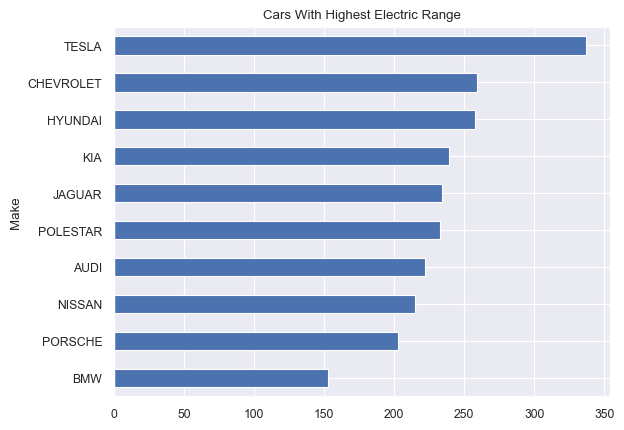

In [ ]:
elec_cars.groupby('Make')['Electric Range'].max().sort_values(ascending=False).head(10).plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.title('Cars With Highest Electric Range')

In [ ]:
elec_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [ ]:
elect_piv = elec_cars.pivot_table(index = 'Model Year' , columns= 'Make' , values='Electric Range' , aggfunc='sum')

In [ ]:
high_range = elect_piv.sum().sort_values(ascending=False).head(5).index
high_range = high_range.tolist()

(2007.0, 2025.0)

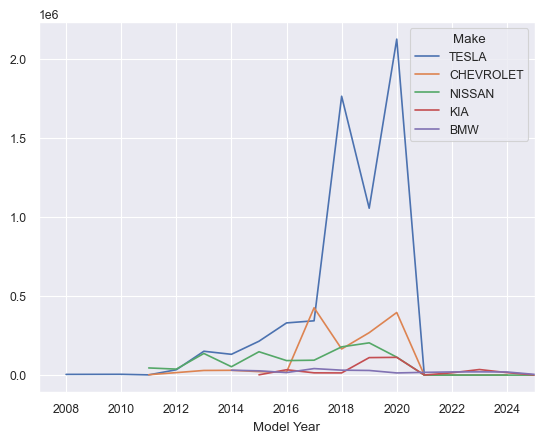

In [ ]:
elect_piv[high_range].plot(kind='line')
plt.xlim(2007 , 2025)

In [ ]:
import ast

In [ ]:
new_data.explode()

In [ ]:
cleaned = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/Cleaned_Dataset.csv')
cleaned.head()

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000


In [ ]:
def conv_num(value):
    return ast.literal_eval(value)

In [ ]:
cleaned['Skill'].explode()

0                                             Python, Sql
1                               Power Bi, Power BI, Excel
2                                                   Undef
3       Fabric, Power BI, Sql, Machine Learning, Genes...
4                               Azure, Power BI, SQL, Aws
                              ...                        
1791                             Information architecture
1792    SQL, Operational risk management, Vendor manag...
1793    Power BI, Data modeling, Business intelligence...
1794        SQL, SAP, Computer skills, Marketing, Workday
1795         Investment, Power BI, SQL, SAP, Office Suite
Name: Skill, Length: 1796, dtype: object

In [ ]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Job Title      1796 non-null   object 
 1   Job Info       1796 non-null   object 
 2   Position       1796 non-null   object 
 3   Employer       1796 non-null   object 
 4   City           1796 non-null   object 
 5   Province       1796 non-null   object 
 6   Skill          1796 non-null   object 
 7   Seniority      1796 non-null   object 
 8   Work Type      1796 non-null   object 
 9   Industry Type  1796 non-null   object 
 10  Min_Salary     1796 non-null   float64
 11  Max_Salary     1796 non-null   float64
 12  Avg_Salary     1796 non-null   float64
dtypes: float64(3), object(10)
memory usage: 182.5+ KB


In [ ]:
cleaned

,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,Undef,"Python, Sql",ANY,Remote,Others,76000.00,89440.0,82720.000
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,Undef,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000.00,87000.0,76000.000
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600.0,75361.795
3,Systems and Data Analysts,Business Intelligence Data Engineer,Data Engineer,"Maximus Services, LLC",Toronto,ON,"Fabric, Power BI, Sql, Machine Learning, Genes...",ANY,In-Person,Service,87875.00,105000.0,96437.500
4,Systems and Data Analysts,"BUSINESS INTELLIGENCE SPECIALIST, FT",Data Specialist,Niagara Health System,Niagara,ON,"Azure, Power BI, SQL, Aws",Senior,In-Person,Healthcare,115211.20,130332.8,122772.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,Business and Marketing Analysts,IM Business Analyst,Business Analyst,Messa,Ottawa,ON,Information architecture,ANY,In-Person,Others,67000.00,102000.0,84500.000
1792,Senior Business Intelligence Analysts,"Risk Analyst, Third Party Risk Management",Risk Analyst,Aviva,Markham,ON,"SQL, Operational risk management, Vendor manag...",ANY,In-Person,Others,94000.00,110000.0,102000.000
1793,Senior Business Analysts,Business Intelligence Analyst,BI Analyst,Clio,Vancouver,BC,"Power BI, Data modeling, Business intelligence...",ANY,In-Person,Others,86000.00,94000.0,90000.000
1794,Senior Supply Chain Data Analysts,"Analyst, Supply Chain Replenishment",Analyst,Loblaw Companies Limited,Brampton,ON,"SQL, SAP, Computer skills, Marketing, Workday",ANY,In-Person,Technology,52000.00,59000.0,55500.000


In [ ]:
(cleaned.loc[0,'Min_Salary'] + cleaned.loc[0,'Max_Salary'])/2

82720.0

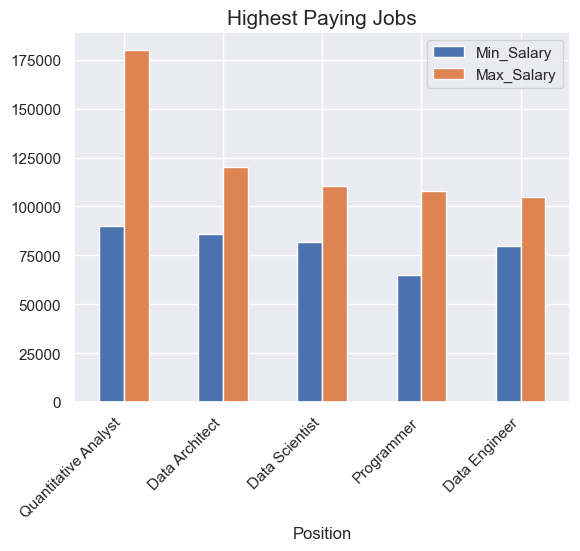

In [ ]:
sns.set_theme('notebook')
cleaned.groupby('Position')[['Min_Salary' ,'Max_Salary' ]].median().sort_values(by = 'Max_Salary' ,
                                                                                 ascending = False).head(5).plot(kind = 'bar')
plt.xticks(rotation = 45 , ha ='right')
plt.title('Highest Paying Jobs' , fontsize = 15)
plt.show()


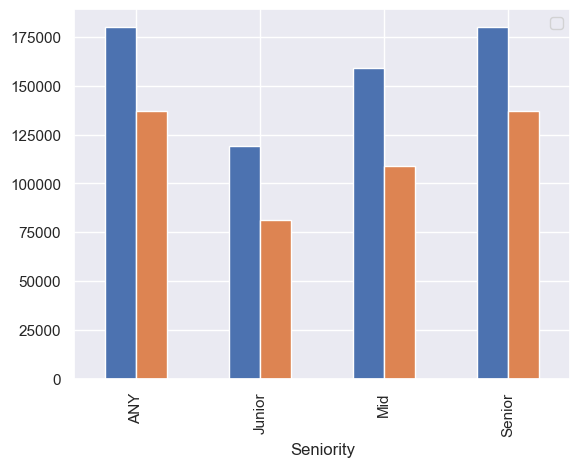

In [ ]:
cleaned.groupby('Seniority')[['Max_Salary','Min_Salary']].max().plot(kind = 'bar')
plt.legend("")

Text(0, 0.5, '')

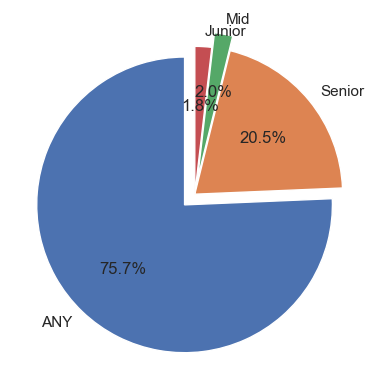

In [ ]:
cleaned['Seniority'].value_counts().plot(kind = 'pie' , startangle = 90 , autopct = '%1.1f%%' ,
                                         explode = (.1,0,.1,0))
plt.ylabel('')

In [ ]:
fifa17 = pd.read_csv('C:/Users/user/Desktop/Machine Learning Full/archive (1)/FIFA17_official_data.csv')
fifa17.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [ ]:
fifa17.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating'],
      dtype='object')

In [ ]:
fifa17.drop(columns = ['Photo', 'Flag','Club Logo','GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision','Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength','ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy' ] ,
            axis =1 , inplace = True)

In [ ]:
fifa17

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Crossing,Finishing,HeadingAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Best Position,Best Overall Rating
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,...,77.0,94.0,77.0,64.0,91.0,88.0,77.0,86.0,ST,88.0
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,€130K,2290,...,73.0,76.0,59.0,81.0,85.0,81.0,78.0,81.0,CDM,84.0
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,...,76.0,77.0,81.0,82.0,83.0,77.0,74.0,75.0,CDM,85.0
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,...,82.0,63.0,75.0,80.0,83.0,86.0,86.0,82.0,LB,84.0
4,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,€225K,2271,...,78.0,71.0,73.0,88.0,90.0,75.0,79.0,79.0,CAM,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17555,233215,C. Addai,18,Ghana,54,72,Coventry City,€130K,€1K,763,...,12.0,6.0,12.0,24.0,11.0,22.0,22.0,23.0,GK,53.0
17556,232911,R. Kamiyama,31,Japan,57,57,Avispa Fukuoka,€90K,€1K,762,...,8.0,6.0,10.0,18.0,11.0,20.0,20.0,21.0,GK,56.0
17557,235387,B. Gaye,18,Germany,53,67,DSC Arminia Bielefeld,€100K,€500,760,...,11.0,5.0,13.0,29.0,15.0,18.0,24.0,22.0,GK,52.0
17558,237904,K. Olifirenko,18,Russia,50,66,FC Tom Tomsk,€60K,€2K,757,...,13.0,5.0,14.0,15.0,14.0,16.0,25.0,24.0,GK,49.0


In [ ]:
def conv_st_num(value):
    return value.replace('€' ,'').replace('M' , '').replace('K' , '')

In [ ]:
fifa17['Value'] = fifa17['Value'].apply(conv_st_num)

In [ ]:
fifa17['Wage'] = fifa17['Wage'].apply(conv_st_num).convert_dtypes(convert_integer=True , )

In [ ]:
fifa17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  object 
 2   Age                       17560 non-null  int64  
 3   Nationality               17560 non-null  object 
 4   Overall                   17560 non-null  int64  
 5   Potential                 17560 non-null  int64  
 6   Club                      17317 non-null  object 
 7   Value                     17560 non-null  object 
 8   Wage                      17560 non-null  string 
 9   Special                   17560 non-null  int64  
 10  Preferred Foot            17560 non-null  object 
 11  International Reputation  17560 non-null  float64
 12  Weak Foot                 17560 non-null  float64
 13  Skill Moves               17560 non-null  float64
 14  Work R

In [ ]:
fifa17[fifa17['Best Overall Rating']>90]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Crossing,Finishing,HeadingAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Best Position,Best Overall Rating
9,20801,Cristiano Ronaldo,31,Portugal,94,94,Real Madrid,87,575,2223,...,84.0,93.0,85.0,77.0,93.0,91.0,92.0,90.0,ST,91.0
58,158023,L. Messi,29,Argentina,93,93,FC Barcelona,89,575,2155,...,77.0,95.0,71.0,87.0,95.0,92.0,87.0,90.0,CAM,92.0


In [ ]:
fifa17.query('Acceleration>95')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Crossing,Finishing,HeadingAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Best Position,Best Overall Rating
164,190483,Douglas Costa,25,Brazil,83,83,FC Bayern München,24.5,110,2100,...,77.0,71.0,58.0,71.0,84.0,96.0,88.0,91.0,CAM,82.0
721,203747,Héctor Bellerín,21,Spain,80,88,Arsenal,18,80,1991,...,74.0,52.0,60.0,59.0,77.0,96.0,94.0,84.0,RB,79.0
3752,212807,K. Manneh,21,Gambia,71,78,Columbus Crew SC,2.3,6,1810,...,59.0,64.0,46.0,53.0,68.0,96.0,92.0,85.0,RW,71.0
8969,190490,M. Bolly,25,Ivory Coast,67,68,SpVgg Greuther Fürth,825,6,1627,...,59.0,63.0,50.0,46.0,62.0,96.0,95.0,73.0,RM,67.0


In [ ]:
fifa17.query("Club =='FC Barcelona' ")

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Crossing,Finishing,HeadingAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Best Position,Best Overall Rating
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,83,525,2291,...,77.0,94.0,77.0,64.0,91.0,88.0,77.0,86.0,ST,88.0
12,189332,Jordi Alba,27,Spain,86,86,FC Barcelona,31.5,225,2214,...,83.0,73.0,63.0,70.0,84.0,93.0,93.0,90.0,LWB,84.0
44,143745,A. Turan,29,Turkey,84,84,FC Barcelona,26.5,225,2166,...,82.0,72.0,70.0,81.0,88.0,78.0,68.0,84.0,CAM,83.0
58,158023,L. Messi,29,Argentina,93,93,FC Barcelona,89,575,2155,...,77.0,95.0,71.0,87.0,95.0,92.0,87.0,90.0,CAM,92.0
85,168651,I. Rakitić,28,Croatia,87,87,FC Barcelona,43.5,275,2136,...,81.0,83.0,58.0,92.0,87.0,67.0,65.0,71.0,CM,84.0
129,205600,S. Umtiti,22,France,83,88,FC Barcelona,27,130,2112,...,69.0,51.0,72.0,73.0,75.0,74.0,75.0,68.0,CB,81.0
168,190871,Neymar,24,Brazil,92,94,FC Barcelona,106,450,2098,...,75.0,89.0,62.0,75.0,95.0,93.0,90.0,96.0,LW,89.0
183,211575,André Gomes,22,Portugal,83,89,FC Barcelona,31.5,150,2091,...,61.0,68.0,69.0,84.0,81.0,72.0,66.0,67.0,CM,81.0
211,41,Iniesta,32,Spain,88,88,FC Barcelona,39.5,325,2083,...,77.0,70.0,54.0,86.0,93.0,73.0,72.0,81.0,CAM,87.0
218,201400,Rafinha,23,Brazil,80,85,FC Barcelona,19,140,2081,...,72.0,74.0,55.0,74.0,84.0,76.0,74.0,81.0,CAM,81.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
all_players  = pd.read_csv('C:/Users/user/Desktop/New folder (2)/all_players.csv')
all_players.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11620\3244580101.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  all_players  = pd.read_csv('C:/Users/user/Desktop/New folder (2)/all_players.csv')


,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,0,1,Kylian Mbappé,91,97,90,80,92,36,78,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,1,2,Rodri,91,66,80,86,84,87,85,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,2,4,Erling Haaland,91,88,92,70,81,45,88,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,3,5,Jude Bellingham,90,80,87,83,88,78,83,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,4,7,Vini Jr.,90,95,84,81,91,29,69,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [ ]:
all_players[['Name' , 'OVR']].query("OVR >=90")

,Name,OVR
0,Kylian Mbappé,91
1,Rodri,91
2,Erling Haaland,91
3,Jude Bellingham,90
4,Vini Jr.,90
5,Kevin De Bruyne,90
6,Harry Kane,90
16161,Aitana Bonmatí,91
16162,Alexia Putellas,90
16163,Caroline Graham Hansen,90


In [ ]:
all_players[['Name' , 'PAC']].query("PAC > 95")

,Name,PAC
0,Kylian Mbappé,97
462,Karim Adeyemi,96


In [ ]:
all_players[['Name' , 'League','OVR']].query("League == 'MLS'")

,Name,League,OVR
16,Lionel Messi,MLS,88
145,Olivier Giroud,MLS,83
271,Luis Suárez,MLS,82
279,Luciano Acosta,MLS,81
288,Sergio Busquets,MLS,81
...,...,...,...
16124,Alex Rando,MLS,48
16125,Tahir Reid-Brown,MLS,48
16128,Tommy Silva,MLS,48
16145,Isaiah Jones,MLS,47


In [ ]:
loan = pd.read_csv("C:/Users/user/Desktop/New folder (2)/Loan.csv")
loan.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
loan['EmploymentStatus'].value_counts()

Employed         17036
Self-Employed     1573
Unemployed        1391
Name: EmploymentStatus, dtype: int64

In [ ]:
loan.groupby('EmploymentStatus')['LoanAmount'].median()

EmploymentStatus
Employed         21925.5
Self-Employed    21706.0
Unemployed       22219.0
Name: LoanAmount, dtype: float64

In [ ]:
loan.groupby('EducationLevel')['LoanAmount'].median().sort_values(ascending=False)

EducationLevel
High School    22122.0
Doctorate      21984.5
Associate      21870.5
Master         21869.5
Bachelor       21799.0
Name: LoanAmount, dtype: float64

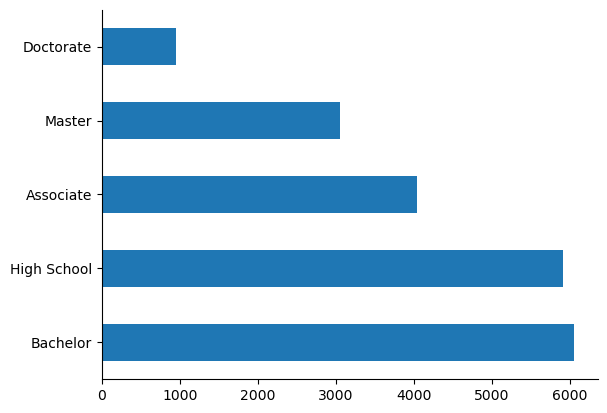

In [ ]:
loan['EducationLevel'].value_counts().plot(kind = 'barh')
sns.despine()

In [ ]:
loan['NetWorth'].idxmax()

168

In [ ]:
loan.loc[168]

ApplicationDate                2018-06-18
Age                                    37
AnnualIncome                        36562
CreditScore                           553
EmploymentStatus                 Employed
EducationLevel                High School
Experience                             14
LoanAmount                          38934
LoanDuration                           48
MaritalStatus                     Married
NumberOfDependents                      0
HomeOwnershipStatus                   Own
MonthlyDebtPayments                   782
CreditCardUtilizationRate        0.271257
NumberOfOpenCreditLines                 4
NumberOfCreditInquiries                 0
DebtToIncomeRatio                0.373455
BankruptcyHistory                       0
LoanPurpose                          Home
PreviousLoanDefaults                    1
PaymentHistory                         26
LengthOfCreditHistory                  11
SavingsAccountBalance                 636
CheckingAccountBalance            

In [ ]:
loan['ApplicationDate'] = pd.to_datetime(loan['ApplicationDate'])

In [ ]:
loan['ApplicationMonth'] =  loan['ApplicationDate'].dt.month
loan['ApplicationMonthName'] =  loan['ApplicationDate'].dt.strftime('%b')
loan['ApplicationYear'] = loan['ApplicationDate'].dt.year

In [ ]:
loan['ApplicationMonth'] = loan['ApplicationMonth'].sort_values()

In [ ]:
loan

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,ApplicationMonth,ApplicationMonthName,ApplicationYear
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,1,Jan,2018
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,1,Jan,2018
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,1,Jan,2018
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,1,Jan,2018
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,1,Jan,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,9,Sep,2072
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,9,Sep,2072
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,10,Oct,2072
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,10,Oct,2072


In [ ]:
loanto24 = loan[loan['ApplicationYear']<=2024]

In [ ]:
loanto24

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,ApplicationMonth,ApplicationMonthName,ApplicationYear
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,1,Jan,2018
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,1,Jan,2018
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,1,Jan,2018
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,1,Jan,2018
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,1,Jan,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2024-12-27,62,33342,601,Employed,Associate,38,34322,48,Married,...,89282,0.228822,0.207444,1058.092626,0.804064,0,49.0,12,Dec,2024
2553,2024-12-28,44,88116,592,Employed,Doctorate,23,10805,48,Married,...,3251,0.209805,0.204742,331.536046,0.116919,1,40.8,12,Dec,2024
2554,2024-12-29,29,101896,498,Employed,High School,7,33595,36,Married,...,619235,0.269595,0.243626,1324.432297,0.191540,1,33.6,12,Dec,2024
2555,2024-12-30,46,53306,627,Employed,Associate,23,27232,48,Married,...,9984,0.208732,0.195731,822.497950,0.240760,0,50.0,12,Dec,2024


Text(0.5, 1.0, 'Monthly Loan Payments')

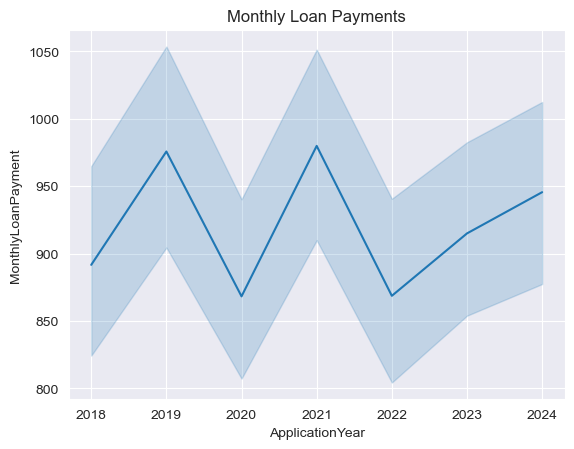

In [ ]:
sns.set_style('darkgrid')
sns.lineplot(data = loanto24 , x ='ApplicationYear' , y = 'MonthlyLoanPayment' )
plt.title('Monthly Loan Payments')

In [ ]:
loanto24.pivot_table(index = 'ApplicationYear' , columns = 'MaritalStatus' , values='RiskScore' , aggfunc ='median')

MaritalStatus,Divorced,Married,Single,Widowed
ApplicationYear,,,,
2018,52.0,51.0,51.0,48.0
2019,52.0,52.0,52.0,54.0
2020,52.0,51.5,51.0,53.0
2021,51.0,51.0,52.0,51.5
2022,52.0,52.0,53.0,51.0
2023,53.0,53.0,52.0,48.5
2024,53.0,51.2,51.0,54.5


<AxesSubplot:xlabel='ApplicationYear'>

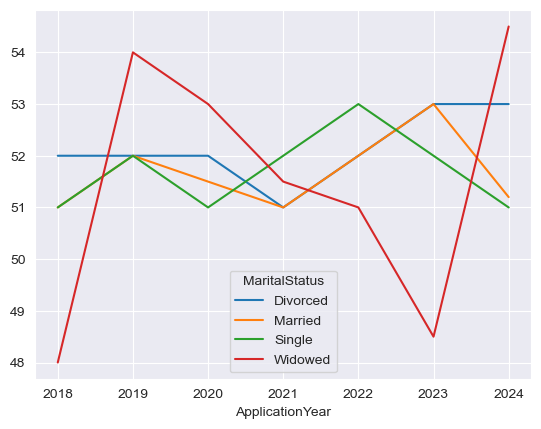

In [ ]:
loanto24.pivot_table(index = 'ApplicationYear' , columns = 'MaritalStatus' , values='RiskScore' , aggfunc ='median').plot(kind = 'line')

In [ ]:
loan_24 = loanto24[loanto24['ApplicationYear']==2024]
loan_24

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,ApplicationMonth,ApplicationMonthName,ApplicationYear
2191,2024-01-01,45,57180,577,Employed,High School,23,18521,12,Single,...,95264,0.195021,0.212507,1726.789670,0.445496,0,58.0,1,Jan,2024
2192,2024-01-02,64,102847,643,Employed,Associate,41,35072,72,Married,...,43558,0.228572,0.274286,997.670562,0.191664,0,61.0,1,Jan,2024
2193,2024-01-03,23,15624,560,Employed,High School,2,39990,60,Single,...,10262,0.264990,0.230273,1127.964516,1.022246,0,56.0,1,Jan,2024
2194,2024-01-04,42,36961,599,Employed,Associate,21,29038,12,Married,...,44889,0.194538,0.186077,2670.608916,0.971600,0,56.0,1,Jan,2024
2195,2024-01-05,32,92747,546,Employed,High School,10,33204,60,Single,...,8497,0.265204,0.269968,1013.832405,0.241151,0,54.0,1,Jan,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2024-12-27,62,33342,601,Employed,Associate,38,34322,48,Married,...,89282,0.228822,0.207444,1058.092626,0.804064,0,49.0,12,Dec,2024
2553,2024-12-28,44,88116,592,Employed,Doctorate,23,10805,48,Married,...,3251,0.209805,0.204742,331.536046,0.116919,1,40.8,12,Dec,2024
2554,2024-12-29,29,101896,498,Employed,High School,7,33595,36,Married,...,619235,0.269595,0.243626,1324.432297,0.191540,1,33.6,12,Dec,2024
2555,2024-12-30,46,53306,627,Employed,Associate,23,27232,48,Married,...,9984,0.208732,0.195731,822.497950,0.240760,0,50.0,12,Dec,2024


In [ ]:
loan_month =loan_24.groupby(['ApplicationMonthName' ,'ApplicationMonth' ])['MonthlyLoanPayment'].sum().reset_index(name = 'Totalloan')
loan_month.sort_values(by ='ApplicationMonth'  , inplace=True)
loan_month



,ApplicationMonthName,ApplicationMonth,Totalloan
4,Jan,1,29825.750485
3,Feb,2,24352.676018
7,Mar,3,27707.021999
0,Apr,4,32813.590494
8,May,5,40962.214251
6,Jun,6,27392.384058
5,Jul,7,26891.390523
1,Aug,8,24758.544598
11,Sep,9,27300.100421
10,Oct,10,28007.088468


<AxesSubplot:xlabel='ApplicationMonthName', ylabel='Totalloan'>

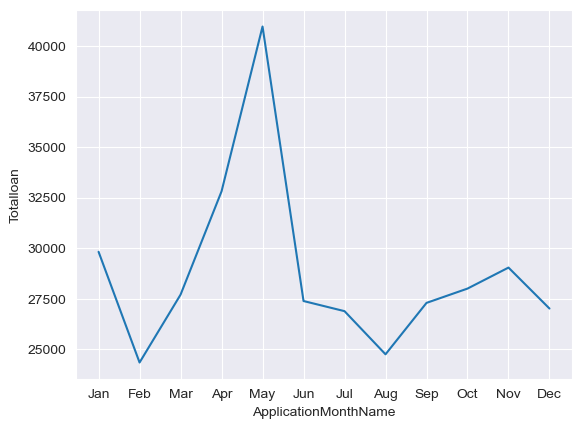

In [ ]:
sns.lineplot(data = loan_month , x ='ApplicationMonthName'  , y = 'Totalloan')

In [ ]:

eduInc = loan.groupby('EducationLevel')['AnnualIncome'].mean().round().sort_values(ascending=False)
eduInc

EducationLevel
Doctorate      72683.0
Master         66503.0
Bachelor       61678.0
Associate      56973.0
High School    52103.0
Name: AnnualIncome, dtype: float64

Text(0.5, 1.0, 'Most Paid Level Of Education')

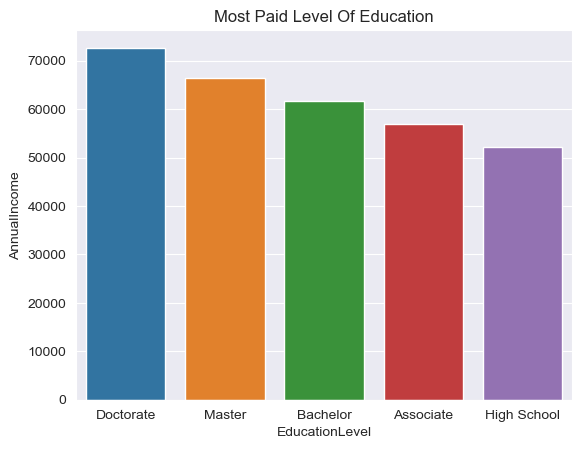

In [ ]:
sns.barplot(x  = eduInc.index ,y = eduInc)
plt.title('Most Paid Level Of Education')

In [ ]:
loan_24

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,ApplicationMonth,ApplicationMonthName,ApplicationYear
2191,2024-01-01,45,57180,577,Employed,High School,23,18521,12,Single,...,95264,0.195021,0.212507,1726.789670,0.445496,0,58.0,1,Jan,2024
2192,2024-01-02,64,102847,643,Employed,Associate,41,35072,72,Married,...,43558,0.228572,0.274286,997.670562,0.191664,0,61.0,1,Jan,2024
2193,2024-01-03,23,15624,560,Employed,High School,2,39990,60,Single,...,10262,0.264990,0.230273,1127.964516,1.022246,0,56.0,1,Jan,2024
2194,2024-01-04,42,36961,599,Employed,Associate,21,29038,12,Married,...,44889,0.194538,0.186077,2670.608916,0.971600,0,56.0,1,Jan,2024
2195,2024-01-05,32,92747,546,Employed,High School,10,33204,60,Single,...,8497,0.265204,0.269968,1013.832405,0.241151,0,54.0,1,Jan,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2024-12-27,62,33342,601,Employed,Associate,38,34322,48,Married,...,89282,0.228822,0.207444,1058.092626,0.804064,0,49.0,12,Dec,2024
2553,2024-12-28,44,88116,592,Employed,Doctorate,23,10805,48,Married,...,3251,0.209805,0.204742,331.536046,0.116919,1,40.8,12,Dec,2024
2554,2024-12-29,29,101896,498,Employed,High School,7,33595,36,Married,...,619235,0.269595,0.243626,1324.432297,0.191540,1,33.6,12,Dec,2024
2555,2024-12-30,46,53306,627,Employed,Associate,23,27232,48,Married,...,9984,0.208732,0.195731,822.497950,0.240760,0,50.0,12,Dec,2024


<AxesSubplot:xlabel='Age', ylabel='Experience'>

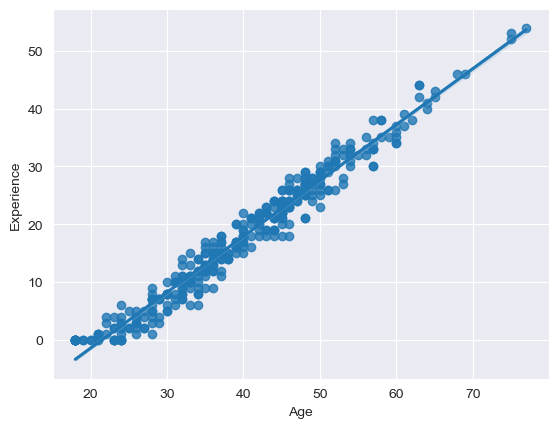

In [ ]:
sns.regplot(data = loan_24 , x = 'Age' , y = 'Experience')

<AxesSubplot:xlabel='ApplicationYear'>

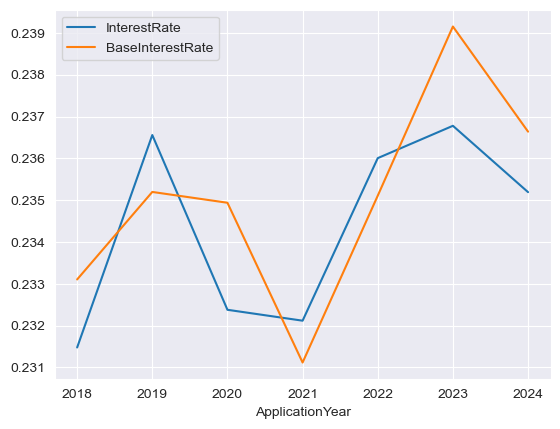

In [ ]:
loan.groupby('ApplicationYear')[[ 'InterestRate' , 'BaseInterestRate']].median().head(7).plot(kind = 'line')

In [ ]:
loan = pd.read_csv("C:/Users/user/Desktop/New folder (2)/Loan.csv")
loan.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
loan['LoanApproved'].value_counts()

0    15220
1     4780
Name: LoanApproved, dtype: int64

In [ ]:
loan['Loanapproved'] = loan['LoanApproved'].map({0:'No' , 1:'Yes'})

In [ ]:
loan

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,Loanapproved
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0,No
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0,No
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0,No
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0,No
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0,No
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0,No
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0,No
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0,No


Text(0, 0.5, '')

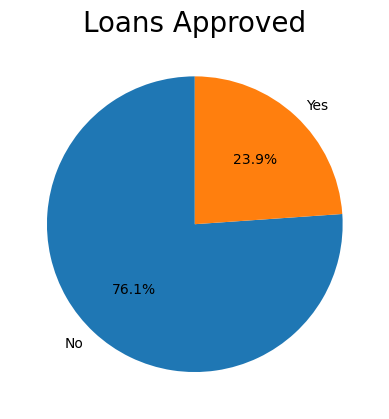

In [ ]:
loan['Loanapproved'].value_counts().plot(kind = 'pie' ,
                                         startangle =90 ,
                                         autopct = '%1.1f%%')
plt.title('Loans Approved' , fontsize = 20)
plt.ylabel('')

In [ ]:
loan['ApplicationDate'] = pd.to_datetime(loan['ApplicationDate'])

In [ ]:
loan['ApplicationYear'] = loan['ApplicationDate'].dt.year
loan['ApplicationMonth'] = loan['ApplicationDate'].dt.month
loan['ApplicationMon'] = loan['ApplicationDate'].dt.strftime('%b')

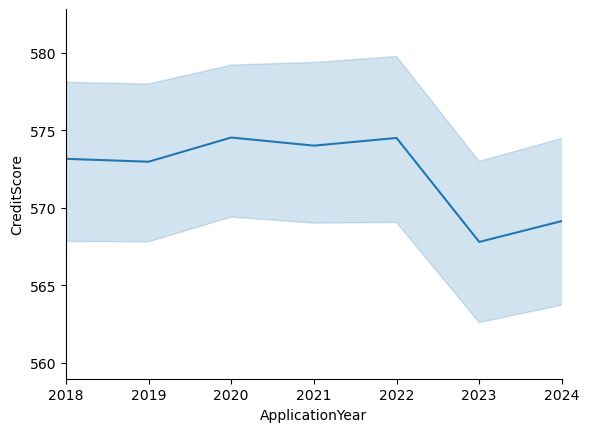

In [ ]:
sns.lineplot(data =  loan , x = 'ApplicationYear' , y = 'CreditScore')
plt.xlim(2018,2024)
sns.despine()

<AxesSubplot:xlabel='ApplicationYear', ylabel='NetWorth'>

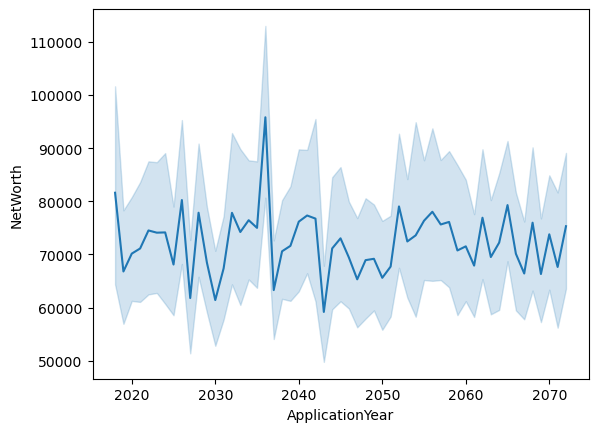

In [ ]:
sns.lineplot(data = loan ,  x = 'ApplicationYear' , y = 'NetWorth')

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

In [ ]:
loan.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore,ApplicationYear,ApplicationMonth
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780,2044.880550,6.50280
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262,15.807652,3.44286
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000,2018.000000,1.00000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000,2031.000000,4.00000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000,2045.000000,7.00000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000,2059.000000,9.00000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000,2072.000000,12.00000


c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CreditScore'>

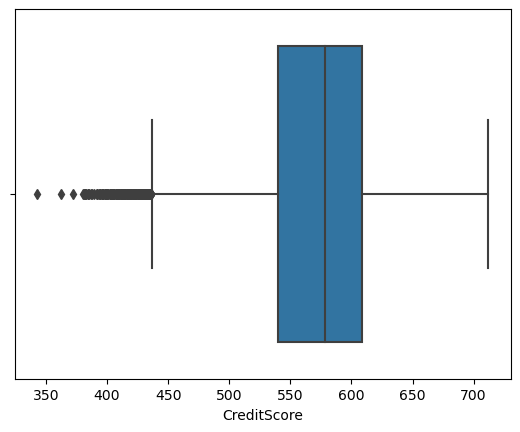

In [ ]:
sns.boxplot(loan['CreditScore'])

In [ ]:
loan.groupby('EducationLevel')['AnnualIncome'].median().round()

EducationLevel
Associate      46834.0
Bachelor       51626.0
Doctorate      59025.0
High School    42722.0
Master         54544.0
Name: AnnualIncome, dtype: float64

In [ ]:
from scipy import misc
import matplotlib.pyplot as plt

In [ ]:
ascent = misc.ascent()
plt.gray()
plt.imshow(ascent)
plt.show()
plt.xlim(0,100)

NameError: name 'misc' is not defined

(768, 1024, 3)
<built-in method max of numpy.ndarray object at 0x000001F79071ABD0>
uint8


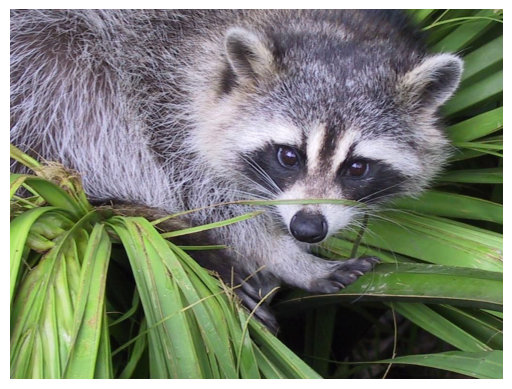

In [ ]:
import scipy.misc
face = scipy.misc.face()
print(face.shape)
print(face.max)
print(face.dtype)
plt.axis("off")
plt.gray()
plt.imshow(face)
plt.show()